<a href="https://www.kaggle.com/code/micheldc55/89-accuracy-with-4-lines-of-code-using-hf?scriptVersionId=113798369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="text-align:center;">
    📗📕🤓Building a Sentiment Classifier in 4 lines of code ussing HuggingFace!🤓📕📗
</h1>

***

<h1>
    Introduction to Transformers
</h1>

<div style="font-size:18px;">
    Sentiment Analysis is a type of problem in Natural Language Processing that involves determining whether a text has a positive or negative sentiment. This task is not as easy as one might think, because language is by definition very intricate and complex. This is accentuated even more in this types of datasets where we want to value sentiment based on a free-text review, as the user can write whatever he decides in it. Historically, this was a problem that used to be solved by making a sort of educated count of positive words vs negative words to quantify the overall sentiment of the text.
    <br><br>
    As yo may imagine, this can get complex really fast. Let's think of an example like the following review: "The movie was very good". We would hope that our model is able to classify this as positive, as this is in fact a positive review. But now, let's think of another example like: "The movie was not very good". This time, the word "not" is negating the "positiveness" of the word very good, and so it's not easy for a model to understand this intricacies if it is just counting positive or negative sentiment.
    <br><br>
    The next type of models we tried were Recurrent Neural Networks. This models try to understand the <b>sequential</b> relationship between words in a sentence by basically building a network that considers the results of the previous tokens or words for predicting the next one. This results in more powerful networks as language is by definition sequential. This concept of sequential is what we generally call <b>context</b>. Using this networks (particularly RNNs and LSTMs), language models got much more sophisticated as we were able to make predictions based on what previous words appeared in the sentence. But this had a problem, and that is that context is <b>bidirectional</b> in nature. This means that we may be referring to a token that comes <b>after</b> the token, not just before. And these models tend to fail in cases were context is more related to words that follow the word we are passing to the model.
    <br><br>
    So a few year back, a new player came to town, and it revolutionized the world of Deep Learning, first in the field of NLP, but it has now diversified and they can be seen everywhere, and the are called <b>Transformers</b>. Using a mechanism called self-attention and bidirectionality, the first transformers were able to introduce <b>context</b> to sentences in both directions, while simultaneously understanding <b>which tokens were relevant</b> to the meaning of the sentence. Using huge datasets, these transformer based models have taken over the world of NLP. Today, we are going to be using a very particular type of model pre-trained for sentiment analysis to try to infer the sentiment of a given movie review.
</div>

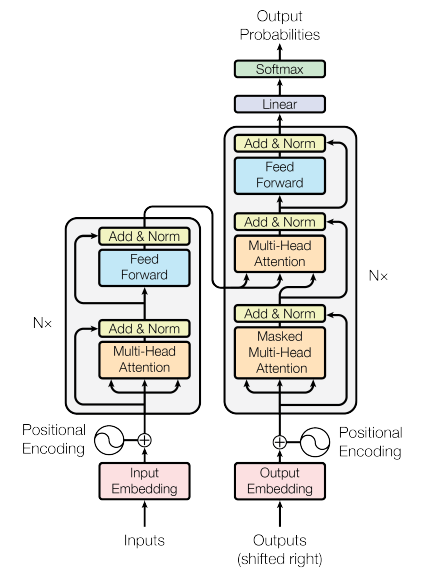
The image shows the typical architechture of a transformer model
</img>

***

<h1>
    Introduction to the HuggingFace transformers library
</h1>

<div style="font-size:18px;">
    The <b>transformers</b> library by HugginFace 🤗 allows us to access these pre-trained transformer models for free! These models can then be fine-tuned to perform a specific task we want to do with them. Even better than that, HuggingFace already offers a set of transformer models that have been fine-tuned to perform different tasks. If you want to know more about the different fine-tuned models huggingface offers, visit <a href="https://huggingface.co/docs/transformers/main_classes/pipelines">this link</a>. For this exercise we will be using the sentiment-analysis model offered in the <b>pipeline</b> class.
    <br><br>
    First, we need to install the transformers library in the kernel (or in your local coputer, if you are running this process locally. Then we will simply import the "pipeline" class from the transformers library, together with some extra libraries that will be useful to read the data and calculate the model accuracy.
</div>

In [1]:
! pip install transformers

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from transformers import pipeline

<h1>
    Reading the data
</h1>

<div style="font-size:18px;">
    In order to use the model, we will read the data from the movie.csv folder in the kernel, which contains a lot of movie reviews in a "text" column and a tag that indicates if the sentiment of the text for that entry is positive (1) or negative (0), indicated by the column name "label". The inference part of the process using the pre-trained models can be time-consuming, so we will limit the process to a sample that contains 2000 positive reviews and 2000 negative reviews, since we simply want to test out the pre-trained model and see what accuracy we get.
    <br><br>
    In order to visualize the results, we will save the first line as an example to test the model and validate that the output is what we want out of it. This is what we are doing below in the "test_drive" variable.
</div>

In [3]:
df = pd.read_csv('/kaggle/input/imdb-movie-ratings-sentiment-analysis/movie.csv')

test_drive = df.iloc[0]
test_drive

text     I grew up (b. 1965) watching and loving the Th...
label                                                    0
Name: 0, dtype: object

<h1>
    Testing the pipeline model from HF 🤗
</h1>

<div style="font-size:18px;">
    Now let's make an inference on some text with the model by using HuggingFace's <b>pipeline object</b>. The pipeline object allows us to create an instance of the pre-trained model we discussed before, and make quick inference calls to get a prediction. The model we will load is a PyTorch model, so we have to use it's API to make a prediction. The API is simply: model("what you want to predict")
    <br><br>
    Something that we do have to take into account is that the model by default loads the BERT uncased model, a bidirectional transformer developed by Google. The model allows you to input texts that can be up to <b>512 tokens long</b>, so we have to be wary of that. Texts in this dataset are often longer than that, so we need to be ready to solve that issue.
    <br><br>
    If you are interested, the model actually defaults to <b>Distil-BERT</b>, which is a lighter version of the full-sized model. This model is trained in english and makes no distinction between cased and uncased characters. It is a good place to start and it is also the default model. If you are interested, I can also post another notebook trying out different pre-trained models and checking out how they fair against each other for this task.
    <br><br>
    The inference process of the BERT model takes some time, so we are going to run it on a subset of our original DataFrame, just to reduce computational costs. If you want to test it in the entire 40.000 entries dataset, you can do so but it will take some time. Simply change the inference_df to point to the entire dataset (df) by running the following command (bear in mind the accuracy will be almost identical):
</div>

```python
inference_df = df.copy()
```



In [4]:
test_drive['text']

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [5]:
smaller_df = pd.concat([
    df[df['label'] == 1].sample(2000, random_state=101),
    df[df['label'] == 0].sample(2000, random_state=101)
])

inference_df = smaller_df.copy()

<h1>
    Building the model for Sentiment Analysis
</h1>

<div style="font-size:18px;">
    The only thing we need now to use the model is to instanciate the pipeline class and save it into a variable called "model". <b>The output of the pipeline object is the pre-trained model</b> with it's weights, so you only need to pass a text through the model to get a prediction.
    <br><br>
    Remember we <b>still have to reduce the number of tokens (words)</b> to the maximum number allowed by the pre-trained BERT model. We will do that by simply truncating the results to 512 tokens at most. That is, if the string contains more than 512 words, simply keep the first 512.
    <br><br>
    After that, the only thing remaining is to calculate the accuracy of the model as is. We will do so by using the accuracy_score function from the sklearn.metrics library. Let's do that below:
</div>


In [6]:
model = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

2022-12-14 10:43:08.437219: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [7]:
model(test_drive['text'])

[{'label': 'NEGATIVE', 'score': 0.9997420907020569}]

<div style="font-size:18px;">
    Let's preprocess the DataFrame so that it doesn't contain any sentence that is larger than 512 words (tokens).
</div>

In [8]:
inference_df['text'] = inference_df['text'].map(lambda x: x if len(x.split(' ')) <= 280 else ' '.join(x.split(' ')[:280]))

In [9]:
y_pred = model(inference_df['text'].to_list())
y_pred_values = [1 if dictionary['label'] == 'POSITIVE' else 0 for dictionary in y_pred]
y_pred_values

[1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,


In [10]:
y_true = inference_df['label']

accuracy_score(y_true, y_pred_values)

0.89425

In [11]:
print(classification_report(y_true, y_pred_values))
print(confusion_matrix(y_true, y_pred_values))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2000
           1       0.91      0.87      0.89      2000

    accuracy                           0.89      4000
   macro avg       0.90      0.89      0.89      4000
weighted avg       0.90      0.89      0.89      4000

[[1833  167]
 [ 256 1744]]


<h1>
    Conclusion:
</h1>

<div style="font-size:18px;">
    In the end, we get a model that predicts 89% of the reviews correctly, and with no training at all! This models by HuggingFace are very good off-the-shelf tools, and can work really good even if you decide not to fin-tune them. If you have a sentiment analysis task and you don't have the time or the technical knowledge to re-train this model on your data, you can try this approach and see for yourself that the results can be really good!
</div>